# Project overview
In this project, we shall use the housing dataset provided by kaggle to train our machine learning model in order to be able to predict prices based on given attributes
The columns of the dataset and their attributes can be found here: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

The evaluation metric that we shall use to evaluate our regression model is the root mean square metric on the logarithm of house prices as per the competition. This is inorder to punish any particularly large errors (as compared to mean absolute error (MAE)) that our model may make because when predicting house prices it is undesirable that we are way off the mark.

The way we will evaluate our model is by splitting the training data we have into training sets and validation set

In [255]:
#Importing packages for explorotary data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Importing the data

In [302]:

house=pd.read_csv('train.csv')
train_id=house.Id
house.drop('Id',axis=1,inplace=True)
#get an idea of the shape of our data set
house.shape
#we have 81 columns and 1460 rows



(1460, 80)

In [257]:
#quick view of the description of all the numeric columns
house.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


<AxesSubplot:>

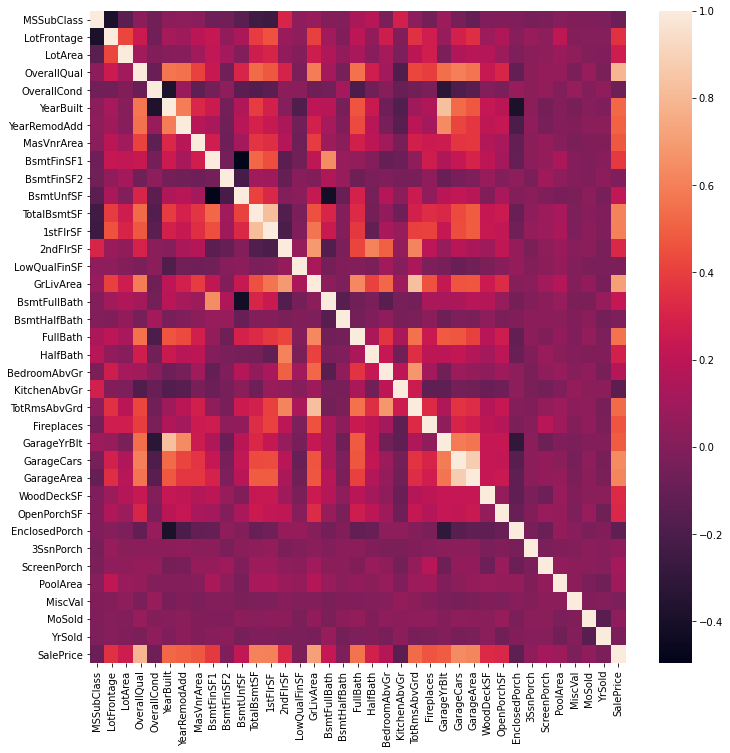

In [258]:
#lets visualize the correlations between the various columns
cor=house.corr()
plt.figure(figsize=(12,12))
sns.heatmap(cor)

From the above heatmap, we straightaway note that some variables are highly correlated which may give rise to multicollinearity problem when running our model in the future.Hence, let us zoom in the 10 highest correlations and see what variables we can eliminate.



<AxesSubplot:>

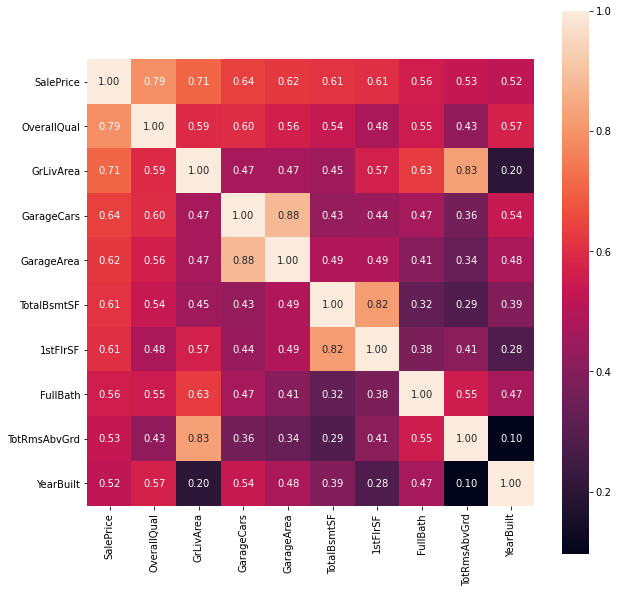

In [259]:
#Extracting the 10 columns that have the highest correlation to the sale price
#varaible
cols=cor.nlargest(10,'SalePrice')['SalePrice'].index 
temp_df_corr=house.loc[:,cols].corr()
plt.figure(figsize=(10,10))
sns.heatmap(temp_df_corr,square=True,annot=True,fmt='.2f')
#from the below observations, we note that  variables GLivArea and TotrmsAbv grid are highly correlated so we shall drop
#GLiv Area
# Same with GarageArea and GarageCars so we shall drop GarageArea
# Same with TotalBsmtSF and 1stFlrSF so we shall drop 1stFlrSF



In [260]:
house.drop('GrLivArea',axis=1,inplace=True)
house.drop("GarageArea",axis=1,inplace=True)
house.drop('1stFlrSF',axis=1,inplace=True)


In [261]:
#Delete
#creating a function to get a unique count of categorical variables

def value_count(df):
    new_df=df.select_dtypes(exclude=np.number)
    result={}
    for key,value in new_df.items():
        result[key]=value.nunique()
    return result


missing=house.isna().sum()

print(missing[missing>0])
    


LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


# Dropping Columns
From the above output, we can see that LotFrontage, Alley,FireplaceQu,PoolQC,Fence and MiscFeature all have many missing values 
and we can drop them since they would be unliklely to contribute significantly to the prediction of house prices


In [262]:
house.drop(labels=['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

# Dropping more categories

It appears that is a good idea to drop all garage variables except GarageCars and all basement variables except GarageCars and TotalBsmtSf because it is likely that the other variables are highly correlated with the ones stated above





In [283]:
basementcols=list(filter(lambda x:x[:4]=='Bsmt',house.columns))
garagecols=list(filter(lambda x:x[:6]=='Garage',house.columns))
garagecols.remove('GarageCars')
house.drop(basementcols+garagecols,axis=1,inplace=True)


0       2
1       2
2       2
3       3
4       3
       ..
1455    2
1456    2
1457    1
1458    1
1459    1
Name: GarageCars, Length: 1451, dtype: int64

In [284]:
#Checking missing data
missing=house.isna().sum()
missing[missing>0]

Series([], dtype: int64)

In [265]:
#Now we can see that the number of missing values are minimal and we can simply drop the rows where there is missing data 
#without losing a significant amount of data

house.dropna(inplace=True)


# Final processing
We shall first encode the categorical columns into numbers in oder to prepare the data set to be passed into the machine learning algorimths by using the pd.get_dummies method

We also split the data into training and validation sets before filling missing values to ensure that the training and validation sets do not see each other.

In [266]:
from sklearn.model_selection import train_test_split



house=pd.get_dummies(house)

X=house.drop('SalePrice',axis=1)
y=house.SalePrice

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)

sum(house.isna().sum())

0

In [267]:
#verify that all the columns are numeric


# Modelling
Now that our data is ready, we shall use some regression models built in to sklearn's library to train on the training set and use it to predict house prices based on the validation set. We shall use the RMSE (Root mean square Error) metric to evaluate our model using the values predicted based on the validation set and the actual values in the validation set.

The models that we shall try out are our standard linear regression model(A linear model), the RandomForestModel (A decision tree model), SVR (A support vector machine model), Ridge regressor and GradientBoostingRegression (a gradient boosting model). 

In [282]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer



models={'LinearRegressor':LinearRegression(),
       'RandomForestRegressor':RandomForestRegressor(),
       'SupportVectorRegressor':SVR(),
       'Ridge':Ridge(),
        'GBR':GradientBoostingRegressor()}

def rmse(y_test,y_pred):
    return np.sqrt(mean_squared_error(np.log(y_test),np.log(y_pred)))
    
def evaluator(models):
    result={}
    for model_name,model in models.items():
        model.fit(X_train,y_train)
        
        y_pred=model.predict(X_val)
        y_pred=abs(y_pred)
        result[model_name]=rmse(y_val,y_pred)
    return result
        
        
evaluator(models)


{'LinearRegressor': 0.18761208061753615,
 'RandomForestRegressor': 0.14438613330510783,
 'SupportVectorRegressor': 0.36962327713816095,
 'Ridge': 0.2050283157236378,
 'GBR': 0.14664979170016754}

# Selecting a final model to use

From the above, it is we can see that the GradientBoostingRegressor algorithm results in the lowest RMSE error between the logarithm of predicted values and logarithm of actual values and hence is the best performing model among the 4 selected models, we shall focus on using that model and tuning its hyperparameters.

We shall do this in stages, starting with the n_estimators parameter, which is the number of trees which vote for the final decision

In [ ]:
from sklearn.model_selection import GridSearchCV
gbr_grid={'n_estimators':[10,100,1000]}
regressor=GradientBoostingRegressor()
gbr_mod=GridSearchCV(regressor,
                   param_grid=gbr_grid,
                    scoring=make_scorer(rmse,greater_is_better=False),
                   cv=5)
gbr_mod.fit(X_train,y_train)


In [ ]:
gbr_mod.best_params_

In [ ]:
#best params is 1000 based on the above output let is try to further tune this 

gbr_grid={'n_estimators':[1000,1200,1500]}
regressor=GradientBoostingRegressor()
gbr_mod=GridSearchCV(regressor,
                   param_grid=gbr_grid,
                    scoring=make_scorer(rmse,greater_is_better=False),
                   cv=5)
gbr_mod.fit(X_train,y_train)


In [ ]:
#We shall stick to 1000
gbr_mod.best_params_

In [ ]:
#next, we shall attempt to tune the remaining parameters now that number of estimators is tuned. I tuned the number of 
#estimators first in order to drastically reduce the time that this step would take
#We shall also instantiate the model with n_estimators= 1200 which was the best param as found by the grid search above

gbr_grid={'max_depth':[5,10,20,30],"max_features":["auto",'sqrt'],
     "min_samples_split":[2,4,6],
    "min_samples_leaf":[1,2,4]}

model=GradientBoostingRegressor(n_estimators=1000)
gbr_mod=GridSearchCV(regressor,
                   param_grid=gbr_grid,
                    scoring=make_scorer(rmse,greater_is_better=False),
                   cv=5)
gbr_mod.fit(X_train,y_train)


In [ ]:
gbr_mod.best_params_

In [ ]:
model=GradientBoostingRegressor(n_estimators=1000,)
dic={'GBR':model}
print(evaluator(dic))
print(GradientBoostingRegressor().get_params())

From the above output, we can see that the tuned model performs worse than the model with default parameters in terms of the default characteristics. Hence, we shall run GridSearchCV again but this time spreading our parameters around the default values where appropriate.

In [ ]:
gbr_grid={'max_depth':[1,2,3,4],"max_features":['sqrt'],
     "min_samples_split":[2,3,4],
    "min_samples_leaf":[3,4,5]}

gbr_mod=GridSearchCV(regressor,
                   param_grid=gbr_grid,
                    scoring=make_scorer(rmse,greater_is_better=False),
                   cv=5)

gbr_mod.fit(X_train,y_train)

In [ ]:
gbr_mod.best_params_

In [ ]:
# Let us try running the mod again with our new parameters
final_model=GradientBoostingRegressor(n_estimators=1000,max_depth=4,max_features='sqrt',min_samples_leaf=3,min_samples_split=2)

dic={'GBR':final_model}

evaluator(dic)

In [ ]:
# we note that there is not much difference between our tuned model and the default model which suggests that the default 
#model is a good fit. However, we shall use the tuned model to make predictions

# Making predictions and submitting on kaggle
Now that we have created our model and optimized the parameters, we can preprocess our test dataset to make it look like our training data before using our model to predict house prices for the test data set.


In [328]:
# first, let us define a preprocessor function which carries out the preprocessing carried out on our training data on the 
# test data
#Defining a general function to process our test data
#importing the test data

test=pd.read_csv('test.csv')
test_id=test.Id
test.drop('Id',axis=1,inplace=True)


test.shape

test.isna()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,False,False,False,False,False,True,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,True,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,False,False,False,False,False,True,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1455,False,False,False,False,False,True,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1456,False,False,False,False,False,True,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1457,False,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [329]:
def preprocessor(df):
    df.drop('GrLivArea',axis=1,inplace=True)
    df.drop("GarageArea",axis=1,inplace=True)
    df.drop('1stFlrSF',axis=1,inplace=True)
    df.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
    
    basementcols=list(filter(lambda x:x[:4]=='Bsmt',df.columns))
    garagecols=list(filter(lambda x:x[:6]=='Garage',df.columns))
    garagecols.remove('GarageCars')
    df.drop(basementcols+garagecols,axis=1,inplace=True)
    
    #There could be missing data but we cannot drop these columns as there would be rows missing hence we will simply
    #impute the mode for categorical data and the median for numeric data
    for keys,values in df.items():
        if pd.api.types.is_numeric_dtype(values):
            df[keys]=values.fillna(values.median())
        else:
            df[keys]=values.fillna(values.mode())

    
   
    df=pd.get_dummies(df)
    #we will drop categories that are present in the test set but not in the training set
    drop=[]
    for i in df.columns:
        if i not in X_train.columns:
            drop.append(i)
    df.drop(drop,axis=1,inplace=True)
    #we will add categories that are present in the training set but not in the test set
    for i in X_train.columns:
        if i not in df.columns:
            df[i]=0
    
    return df


#processing our test data



test=preprocessor(test)



In [330]:
#verifying that the test set and the training set have the same shape and columns
test.shape
print(set(X.columns)==set(test.columns))


#ensuring that the order of columns in both test set and training set is the same

test=test[X.columns]

#verifying that this is the case
print(list(X.columns)==list(test.columns))

True
True


In [340]:
#training our model on the entire dataset
final_model.fit(X,y)
#predicting house prices in the test set
pred=list(final_model.predict(test))
#concatenating our predictions with the id
final_df=pd.DataFrame({'SalePrice':pred},index=test_id)
final_df.isna().sum()
#exporting the data to a csv in order to make a submission
final_df.to_csv('Submission.csv')